# Uvod v Pandas

## O Pandas-u


**Dimension & Description**



<table class="table table-bordered">
<tbody><tr>
<th style="text-align:center;">Data Structure</th>
<th style="text-align:center;">Dimensions</th>
<th style="text-align:center;">Description</th>
</tr>
<tr>
<td style="text-align:center;">Series</td>
<td style="text-align:center;">1</td>
<td style="text-align:center;">1D labeled homogeneous array, sizeimmutable.</td>
</tr>
<tr>
<td style="text-align:center;">Data Frames</td>
<td style="text-align:center;">2</td>
<td style="text-align:center;">General 2D labeled, size-mutable tabular structure with potentially heterogeneously typed
columns.</td>
</tr>
<tr>
<td style="text-align:center;">Panel</td>
<td style="text-align:center;">3</td>
<td style="text-align:center;">General 3D labeled, size-mutable array.</td>
</tr>
</tbody></table>


In [2]:
## Importing pandas
import pandas as pd

Check the version:

In [3]:
pd.__version__

'0.24.2'

## Reminder about Built-In Documentation



For example, to display all the contents of the pandas namespace, you can type

In [6]:
#ukaze lahko dopolnjujemo s tabom : pd. + TAB
#pd.<TAB>

And to display Pandas's built-in documentation, you can use this:

In [7]:
#dokumentacija
pd?
pd.DataFrame.max()?

SyntaxError: invalid syntax (<ipython-input-7-b2a0af21c7a8>, line 3)

More detailed documentation, along with tutorials and other resources, can be found at http://pandas.pydata.org/.

## Introducing Pandas Objects



In [8]:
import numpy as np
import pandas as pd

### The Pandas Series Object


In [9]:
#vsak podatek v series ima svoj index
#series je sestavljen iz dveh objektov: iz indexa in iz nd arraya (vrednsoti)
data = pd.Series([0.25, 0.5,0.75,01.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [10]:
type(data)

pandas.core.series.Series

In [11]:
#ima dva atributq, s katerimi lahko ven potegnemo vrednosti in index
#vsak index ima svojo vrednost: podobno kot dictionary
#vrednosti
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [12]:
#tvrednosti so tipa numpy array-a: pandas je anrejena nad numpy knjižnico
type(data.values)

numpy.ndarray

In [13]:
#index
data.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
type(data.index)

pandas.core.indexes.range.RangeIndex

In [15]:
data[1]

0.5

In [16]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#### Series as generalized NumPy array



In [18]:
#series-u lahko damo poljuben index (tega v numpy arrayij ne moremo)
data2 = pd.Series([0.25,0.5,0.75,1.0], index = ['a','b', 'c', 'd'])
data2

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [20]:
#vrednosti pri indexu 'b'
data2['b']


0.5

In [21]:
data2[1]

0.5

In [ ]:
#iščemo lahko po privzetem imenu indexa (a,b,c,d)
#drugi način je indeksiranje,, ki je enako kot pri numpy-u (indeks nd arraya)

#### Series as specialized dictionary

In [22]:
#naredimo Series iz dictionary
#dictionary
population_dict = {'California':3835226, 'Texas': 2595656, 'New York': 5548494, 'Florida': 525416, 'Illinos':156454}

In [24]:
#prevtorimo v series
population = pd.Series(population_dict)
population

California    3835226
Texas         2595656
New York      5548494
Florida        525416
Illinos        156454
dtype: int64

In [25]:
#podatek o popluaciji v Californii
population['California']

3835226

In [26]:
#od texasa do FLoreide
#POZOR: dobimo vključno s Texasom!
population['Texas': 'Florida']

Texas       2595656
New York    5548494
Florida      525416
dtype: int64

#### Constructing Series objects

`>>> pd.Series(data, index=index)`


[Dokumentacija](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

### The Pandas DataFrame Object



In [ ]:
#lahko ga poimenjumeo v dveh smereh: po stolpcih ali po vrsticah

In [27]:
#zgardimo dataframe iz dictionatry
area_dict = {'California':383544226, 'Texas': 256565656, 'New York': 57675648494, 'Florida': 5086416, 'Illinos':154}

In [34]:

#definiramo še en series
area = pd.Series(area_dict)
area

California      383544226
Texas           256565656
New York      57675648494
Florida           5086416
Illinos               154
dtype: int64

In [32]:
#definiramo dataframe: key od Dictionary-ja postanejo stolpci
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,3835226,383544226
Texas,2595656,256565656
New York,5548494,57675648494
Florida,525416,5086416
Illinos,156454,154


In [33]:
#data tip
type(states)

pandas.core.frame.DataFrame

In [37]:
#imena vrstic
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinos'], dtype='object')

In [38]:
#imena stolpcev
states.columns

Index(['population', 'area'], dtype='object')

#### DataFrame as specialized dictionary


In [39]:
#na dataframe lahkomgledamo kot na en poseben slovar
#izbere stolpec (pri numpy je izbralo vrstico?)
states['area']

California      383544226
Texas           256565656
New York      57675648494
Florida           5086416
Illinos               154
Name: area, dtype: int64

kako zgradimo dataframe


In [40]:
#1.
pd.DataFrame(population, columns = ['population'])

,population
California,3835226
Texas,2595656
New York,5548494
Florida,525416
Illinos,156454


In [ ]:
#2. kot več dictionary-jev (primer zgoraj)

In [43]:
#3. iz 2D numpy array
pd.DataFrame(np.random.rand(3,2), columns = ['foo', 'bar'], index = ['a', 'b', 'c'])

,foo,bar
a,0.282986,0.203747
b,0.368079,0.681862
c,0.201486,0.269945


In [45]:
#4. iz list-a dictionary-jev
#vrenosti, ki mu manjkajo, so nan
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### Constructing DataFrame objects



- **From a single Series object**



 - **From a dictionary of Series objects**
 - **From a two-dimensional NumPy array**
 


- **From a list of dicts**



[Dokumentacija](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

### The Pandas Index Object




In [48]:

ind = pd.Index([2,3,4,6])
ind


Int64Index([2, 3, 4, 6], dtype='int64')

In [49]:
ind.ndim

1

In [50]:
#vrednosti indexa ne moremo spreminjati! 
ind[1] = 5


TypeError: Index does not support mutable operations

#### Index as immutable array



## Importing Data with Pandas

In [2]:
import pandas as pd
import numpy as np
#pogledamo podatke, ki so shranjeni v csv
!head data/DATA_fortune_500_2017.csv

In [4]:
#prva vrstica bo postala inde dataframea- (index_col =0)
f500 = pd.read_csv('data/DATA_fortune_500_2017.csv', index_col = 0)


In [5]:
#tip objekta
type(f500)

pandas.core.frame.DataFrame

In [6]:
#oblika df-ja (št_vrstic, št_stolpcev)
f500.shape

(500, 22)

##  Introducing DataFrames



<p><img alt="anatomy of a dataframe" src="https://s3.amazonaws.com/dq-content/291/df_anatomy.svg"></p>



vsak stolpec  v data frame je lahko svoj podatkovni tip 
(ni tako kot pri nd-arrayu, kjer morajo biti vsi stolpci enakega tipa)


In [7]:
#dtype: za vsak stolpec vrne podatkovni tip
#OBJECT: vsi podatkovni tipi, ki ne grejo v nupy tipe (float, int,...), jih pandas zapakira v OBJECT tip
#ponavadi so to stringi
f500.dtypes


Title           object
Website         object
Employees        int64
Sector          object
Industry        object
Hqlocation      object
Hqaddr          object
Hqcity          object
Hqstate         object
Hqzip            int64
Hqtel           object
Ceo             object
Ceo-title       object
Address         object
Ticker          object
Fullname        object
Revenues         int64
Revchange      float64
Profits        float64
Prftchange      object
Assets           int64
Totshequity    float64
dtype: object

In [9]:
#head: vrne prvih 5 vrstic
f500.head()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [10]:
#head(n): izpiše n vrstic
f500.head(2)

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0


In [11]:
#tail: vrne zadnjih 5 vrstic
f500.tail()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
496,Michaels Cos.,http://www.michaels.com,31000,Retailing,Specialty Retailers: Other,"Irving, TX",8000 Bent Branch Dr.,Irving,TX,75063,...,Chairman & Chief Executive Officer,"8000 Bent Branch Dr., Irving, TX 75063",MIK,"The Michaels Companies, Inc.",5197,5.8,378.2,4.2,2148,-1698.0
497,Toll Brothers,http://www.tollbrothers.com,4200,Engineering & Construction,Homebuilders,"Horsham, PA",250 Gibraltar Rd.,Horsham,PA,19044,...,Chief Executive Officer & Director,"250 Gibraltar Rd., Horsham, PA 19044",TOL,"Toll Brothers, Inc.",5170,23.9,382.1,5.2,9737,4229.0
498,Yahoo,http://www.yahoo.com,8500,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,94089,...,"President, Chief Executive Officer & Director","701 First Ave., Sunnyvale, CA 94089",YHOO,Yahoo! Inc.,5169,4.0,-214.3,5.2,48083,31049.0
499,Vistra Energy,http://www.vistraenergy.com,4431,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,75201,...,"President, Chief Executive Officer & Director","1601 Bryan St., Dallas, TX 75201",VST,Vistra Energy Corp.,5164,4.0,-214.3,5.2,15167,6597.0
500,ABM Industries,http://www.abm.com,110000,Business Services,Diversified Outsourcing Services,"New York, NY",1 Liberty Plaza,New York,NY,10006,...,"President, Chief Executive Officer & Director","1 Liberty Plaza, New York, NY 10006",ABM,ABM Industries Incorporated,5145,-2.8,57.2,-25,2281,974.0


In [12]:
#tail(n): vrne zadnjih n vrstic; deaful je 5
f500.tail(3)

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
498,Yahoo,http://www.yahoo.com,8500,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,94089,...,"President, Chief Executive Officer & Director","701 First Ave., Sunnyvale, CA 94089",YHOO,Yahoo! Inc.,5169,4.0,-214.3,5.2,48083,31049.0
499,Vistra Energy,http://www.vistraenergy.com,4431,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,75201,...,"President, Chief Executive Officer & Director","1601 Bryan St., Dallas, TX 75201",VST,Vistra Energy Corp.,5164,4.0,-214.3,5.2,15167,6597.0
500,ABM Industries,http://www.abm.com,110000,Business Services,Diversified Outsourcing Services,"New York, NY",1 Liberty Plaza,New York,NY,10006,...,"President, Chief Executive Officer & Director","1 Liberty Plaza, New York, NY 10006",ABM,ABM Industries Incorporated,5145,-2.8,57.2,-25,2281,974.0


In [15]:
#info o dataframe-u
f500.info()
#info() samo sprinta iinformacije, nikamor jih ne shrani
#a = f500.info() - ne gre, v a spremenljivki ne bo ničesar

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 22 columns):
Title          500 non-null object
Website        500 non-null object
Employees      500 non-null int64
Sector         500 non-null object
Industry       500 non-null object
Hqlocation     500 non-null object
Hqaddr         500 non-null object
Hqcity         500 non-null object
Hqstate        500 non-null object
Hqzip          500 non-null int64
Hqtel          500 non-null object
Ceo            500 non-null object
Ceo-title      500 non-null object
Address        500 non-null object
Ticker         500 non-null object
Fullname       500 non-null object
Revenues       500 non-null int64
Revchange      500 non-null float64
Profits        500 non-null float64
Prftchange     500 non-null object
Assets         500 non-null int64
Totshequity    500 non-null float64
dtypes: float64(3), int64(4), object(15)
memory usage: 89.8+ KB


## Pandas Data Selection - indexing


In [17]:
data = pd.Series(['a', 'b', 'c'], index = [1,3,5])
data

1    a
3    b
5    c
dtype: object

In [18]:
#explicitno indeksiranje: točno povem, kaj hočem izbrati, vzame indeks
data[1]
#data[2] vrne error, ker index 2 ne obstaja

'a'

In [20]:
#vzame podatke od 2. elementa do koder jih ima, ampak do največ 4. elementa
data[1:3]

3    b
5    c
dtype: object

### Selecting pandas data using “loc” (Selecting Columns From a DataFrame by Label)



<p><img alt="loc single column" src="https://s3.amazonaws.com/dq-content/291/loc_single.svg"></p>



In [22]:
##NAČINI ZA ZBIRANJE STOLPCEV v PD

#da nimamo zmede s [1:3], imamo metodo loc in iloc
#metoda loc
#sintaksa: df.loc[row, column]

#izberemo en stolpec po imenu
industries = f500.loc[:,'Industry']
industries


Rank
1                              General Merchandisers
2           Insurance: Property and Casualty (Stock)
3                        Computers, Office Equipment
4                                 Petroleum Refining
5                           Wholesalers: Health Care
6            Health Care: Insurance and Managed Care
7           Health Care: Pharmacy and Other Services
8                           Motor Vehicles and Parts
9                                 Telecommunications
10                          Motor Vehicles and Parts
11                          Wholesalers: Health Care
12                   Internet Services and Retailing
13                              Industrial Machinery
14                                Telecommunications
15                          Wholesalers: Health Care
16                             General Merchandisers
17                              Food and Drug Stores
18                              Food and Drug Stores
19                                Petrole

In [23]:
industries.head()


Rank
1                       General Merchandisers
2    Insurance: Property and Casualty (Stock)
3                 Computers, Office Equipment
4                          Petroleum Refining
5                    Wholesalers: Health Care
Name: Industry, dtype: object

In [24]:
#tip stolpca je series! (ker je enodimenzionalen, ga pandas spremeni v series)
type(industries)

pandas.core.series.Series


<p><img alt="loc list of columns" src="https://s3.amazonaws.com/dq-content/291/loc_list.svg"></p>

In [27]:
#dnapišemo imena stolpcev, ki jih želimo izbrati
more_col = f500.loc[:, ['Employees', 'Revenues', 'Assets']]
more_col.head()

,Employees,Revenues,Assets
Rank,,,
1,2300000,485873,198825
2,367700,223604,620854
3,116000,215639,321686
4,72700,205004,330314
5,68000,192487,56563


In [ ]:
#če izberemo en stolpec, vrne series, če več stolpcev pa dataframe

In [30]:
#slice
#izberemo od revenues do profit stolpca
#pozor: ko zbiramo s pomočjo loc-a in damo imena stolpcev notri, bo zadnji stolpec vedno vključen zraven(
#profits stolpec jer zraven)
financial_data = f500.loc[:, 'Revenues': 'Profits']
financial_data.head()

,Revenues,Revchange,Profits
Rank,,,
1,485873,0.8,13643.0
2,223604,6.1,24074.0
3,215639,-7.7,45687.0
4,205004,-16.7,7840.0
5,192487,6.2,2258.0



<p><img alt="loc slice of columns" src="https://s3.amazonaws.com/dq-content/291/loc_slice.svg"></p>

In [33]:
#bližnjice, ki se jih dosti uporablja
#Single bracket: velja za en stolpec; napišemo kar ime stolpca v oklepaje 
industries = f500['Industry']
industries.head()

Rank
1                       General Merchandisers
2    Insurance: Property and Casualty (Stock)
3                 Computers, Office Equipment
4                          Petroleum Refining
5                    Wholesalers: Health Care
Name: Industry, dtype: object

In [34]:
#še ena krajšnica:
#Dot accesessor: podamo dataframe.ImeStolpca
#Slabosti:
#imena stolpca ne sme vsebovat nobenega posebnega znaka in ne sme vsebovat nobenega presledka
#izberemo eno vrstico
industries = f500.Industry
industries.head()

Rank
1                       General Merchandisers
2    Insurance: Property and Casualty (Stock)
3                 Computers, Office Equipment
4                          Petroleum Refining
5                    Wholesalers: Health Care
Name: Industry, dtype: object

POVZETEK:


<p></p><center>
<table>
<thead>
<tr>
<th>Select by Label</th>
<th>Explicit Syntax</th>
<th>Common Shorthand</th>
<th>Other Shorthand</th>
</tr>
</thead>
<tbody>
<tr>
<td>Single column</td>
<td><code>df.loc[:,"col1"]</code></td>
<td><code>df["col1"]</code></td>
<td><code>df.col1</code></td>
</tr>
<tr>
<td>List of columns</td>
<td><code>df.loc[:,["col1", "col7"]]</code></td>
<td><code>df[["col1", "col7"]]</code></td>
<td></td>
</tr>
<tr>
<td>Slice of columns</td>
<td><code>df.loc[:,"col1":"col4"]</code></td>
<td></td>
<td></td>
</tr>
</tbody>
</table>
</center><p></p>




### Selecting Items from a Series by Label



<p><img alt="dataframe exploded" src="https://s3.amazonaws.com/dq-content/291/df_exploded.svg"></p>



<p><img alt="series vs dataframe: series" src="https://s3.amazonaws.com/dq-content/291/df_series_s.svg"></p>


<p><img alt="series vs dataframe: dataframe" src="https://s3.amazonaws.com/dq-content/291/df_series_df.svg"></p>



<center>
<table>
<thead>
<tr>
<th></th>
<th>Series</th>
<th>DataFrame</th>
</tr>
</thead>
<tbody>
<tr>
<th>Dimensions</th>
<td>One</td>
<td>Two</td>
</tr>
<tr>
<th>Has 'index' axis</th>
<td>Yes</td>
<td>Yes</td>
</tr>
<tr>
<th>Has 'columns' axis</th>
<td>No</td>
<td>Yes</td>
</tr>
<tr>
<th>Number of dtypes</th>
<td>One</td>
<td>Many (one per column)</td>
</tr>
</tbody>
</table>
</center>



In [ ]:
#podobnost med series in data frame-om
#če imamo samo en stolpec, ga pandas avtomatsko pretvori v series
#Edino, če ga "prisilimo", da naredi dataframe: pd.DataFrame()..., potem naredi dataframe z enim stolpcem

In [39]:
#loc metoda pri izbiranju pri series-ih
s = pd.Series([4., 7., -5, 3], index = ['d', 'b', 'a', 'c'])
s

d    4.0
b    7.0
a   -5.0
c    3.0
dtype: float64

In [ ]:
#to dvoje je isto
s['d']
s.loc['d']

In [42]:
#izberemo od parametra d so a
#2 načina:
s['d': 'a']

#z uporbo loc
s.loc['d': 'a']

d    4.0
b    7.0
a   -5.0
dtype: float64

In [44]:
#izberemo več elementov (z listom)
#2 načina
s[['a', 'c']]

#z uporbo loc-a
s.loc[['a', 'c']]

a   -5.0
c    3.0
dtype: float64

In [45]:
#ali s vsebuje index 'a'
'a' in s


True

In [46]:
#index series-a
s.keys()

Index(['d', 'b', 'a', 'c'], dtype='object')

In [47]:
#items
list(s.items())

[('d', 4.0), ('b', 7.0), ('a', -5.0), ('c', 3.0)]

In [53]:
#iz f500 izberi stolpec 'Ceo'
#1. način
ceos = f500['Ceo']
#2. način
f500.Ceo
#3. način
f500.loc[:, 'Ceo']
ceo.head()

Rank
1    C. Douglas McMillon
2      Warren E. Buffett
3        Timothy D. Cook
4        Darren W. Woods
5     John H. Hammergren
Name: Ceo, dtype: object

In [56]:
#izberi 1. element iz dobljenega Ceo
warren_buffett= ceos[2]
warren_buffett

'Warren E. Buffett'

### Selecting Rows From a DataFrame by Label



<p><img alt="anatomy of a dataframe" src="https://s3.amazonaws.com/dq-content/291/df_anatomy_static.svg"></p>



In [57]:
#izbiranje vrstic
#index dataframe-a
f500.index


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
           dtype='int64', name='Rank', length=500)

In [60]:
#radi bi imeli drugačen index (npr.z imeni)
f500.set_index('Title', inplace=True)


KeyError: 'Title'

In [64]:
#izbira ene vrstice
single_row = f500.loc['Walmart']
single_row

#tip je series
type(single_row)

pandas.core.series.Series

In [66]:
#izberemo prve 3 vrstice
list_rows = f500.loc[['Walmart', 'Berkshire Hathaway', 'Apple']]

#tip je dataframe
type(list_rows)

pandas.core.frame.DataFrame

In [68]:
#slicing
slice_rows = f500['Berkshire Hathaway': 'Exxon Mobil']
slice_rows


#ko smo zbirali slice pri stolpcih, smo morali dat f500.loc[:, "imenaStolpcev"]
#bližnjca je v tem primeru rezervirana za vrstice

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0


In [90]:
#izberemo top 3 podjetja in stolpce sektor in industry od teh treh podjetij
top_three = f500.loc[:, ['Sector', 'Industry']].head(3)
top_three



,Sector,Industry
Title,,
Walmart,Retailing,General Merchandisers
Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock)
Apple,Technology,"Computers, Office Equipment"


In [97]:
#izberi vse vrstice od Walmart do Exxon Mobile in stolpce pa od Website:Industry
top_five = f500['Walmart':'Exxon Mobil'].loc[:,'Website':'Industry']
top_five

,Website,Employees,Sector,Industry
Title,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock)
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment"
Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining


**pandas.DataFrame.set_index**

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index

`DataFrame.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)`

Set the DataFrame index (row labels) using one or more existing columns. By default yields a new object.

<table>
<colgroup><col class="field-name">
<col class="field-body">
</colgroup><tbody valign="top">
<tr class="field-odd field"><th class="field-name">Parameters:</th><td class="field-body"><dl class="first docutils">
<dt><strong>keys</strong> <span class="classifier-delimiter">:</span> <span class="classifier">column label or list of column labels / arrays</span></dt>
<dd></dd>
</dl>
<p><strong>drop</strong> : boolean, default True</p>
<blockquote>
<div><p>Delete columns to be used as the new index</p>
</div></blockquote>
<p><strong>append</strong> : boolean, default False</p>
<blockquote>
<div><p>Whether to append columns to existing index</p>
</div></blockquote>
<p><strong>inplace</strong> : boolean, default False</p>
<blockquote>
<div><p>Modify the DataFrame in place (do not create a new object)</p>
</div></blockquote>
<p><strong>verify_integrity</strong> : boolean, default False</p>
<blockquote>
<div><p>Check the new index for duplicates. Otherwise defer the check until
necessary. Setting to False will improve the performance of this
method</p>
</div></blockquote>
</td>
</tr>
<tr class="field-even field"><th class="field-name">Returns:</th><td class="field-body"><dl class="first last docutils">
<dt><strong>dataframe</strong> <span class="classifier-delimiter">:</span> <span class="classifier">DataFrame</span></dt>
<dd></dd>
</dl>
</td>
</tr>
</tbody>
</table>

In [99]:
#iloc: df.iloc[rows, columns]
#izbira po poziciji, ne po imenih
#prvi dve vrstici in vse stolpce
top_five.iloc[0:2, :]

,Website,Employees,Sector,Industry
Title,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock)


In [102]:
# izberem prvih 10 vrstic  in vse stolpce
top_ten = f500.iloc[:10, :]
top_ten.head(2)

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0


In [104]:
#vaja1
#izberi prvih 5 vrstic
top_ten.iloc[:5, :]

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [106]:
#vaja2: izberi celoten data frame
top_ten.iloc[:,:]

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0
UnitedHealth Group,http://www.unitedhealthgroup.com,230000,Health Care,Health Care: Insurance and Managed Care,"Minnetonka, MN",9900 Bren Rd. E.,Minnetonka,MN,55343,952-936-1300,...,Chief Executive Officer & Director,"9900 Bren Rd. E., Minnetonka, MN 55343",UNH,UnitedHealth Group Incorporated,184840,17.7,7017.0,20.7,122810,38274.0
CVS Health,http://www.cvshealth.com,204000,Health Care,Health Care: Pharmacy and Other Services,"Woonsocket, RI",1 CVS Dr.,Woonsocket,RI,2895,401-765-1500,...,"President, Chief Executive Officer & Director","1 CVS Dr., Woonsocket, RI 02895",CVS,CVS Health Corporation,177526,15.8,5317.0,1.5,94462,36830.0
General Motors,http://www.gm.com,225000,Motor Vehicles & Parts,Motor Vehicles and Parts,"Detroit, MI",300 Renaissance Center,Detroit,MI,48265,313-556-5000,...,Chairman & Chief Executive Officer,"300 Renaissance Center, Detroit, MI 48265",GM,General Motors Company,166380,9.2,9427.0,-2.7,221690,43836.0
AT&T,http://www.att.com,268540,Telecommunications,Telecommunications,"Dallas, TX",208 S. Akard St.,Dallas,TX,75202,210-821-4105,...,"Chairman, President & Chief Executive Officer","208 S. Akard St., Dallas, TX 75202",T,AT&T Inc.,163786,11.6,12976.0,-2.8,403821,123135.0


In [108]:
#vaja 3: od 5. vrstice in od 5. stolpca naprej (5. vrstica in 5. stolpec nista vključena)
top_ten.iloc[6:, 6:]

,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,
CVS Health,Woonsocket,RI,2895,401-765-1500,Larry J. Merlo,"President, Chief Executive Officer & Director","1 CVS Dr., Woonsocket, RI 02895",CVS,CVS Health Corporation,177526,15.8,5317.0,1.5,94462,36830.0
General Motors,Detroit,MI,48265,313-556-5000,Mary T. Barra,Chairman & Chief Executive Officer,"300 Renaissance Center, Detroit, MI 48265",GM,General Motors Company,166380,9.2,9427.0,-2.7,221690,43836.0
AT&T,Dallas,TX,75202,210-821-4105,Randall L. Stephenson,"Chairman, President & Chief Executive Officer","208 S. Akard St., Dallas, TX 75202",T,AT&T Inc.,163786,11.6,12976.0,-2.8,403821,123135.0
Ford Motor,Dearborn,MI,48126,313-322-3000,James P. Hackett,"President, Chief Executive Officer & Director","1 American Rd., Dearborn, MI 48126",F,Ford Motor Company,151800,1.5,4596.0,-37.7,237951,29170.0


In [111]:
#vaja4: izberi prvi stolpec in vse vrstice
top_ten.iloc[:, 0]

Title
Walmart                         http://www.walmart.com
Berkshire Hathaway    http://www.berkshirehathaway.com
Apple                             http://www.apple.com
Exxon Mobil                  http://www.exxonmobil.com
McKesson                       http://www.mckesson.com
UnitedHealth Group    http://www.unitedhealthgroup.com
CVS Health                    http://www.cvshealth.com
General Motors                       http://www.gm.com
AT&T                                http://www.att.com
Ford Motor                         http://www.ford.com
Name: Website, dtype: object

In [115]:
#10. vrstica in vsi stolpci v njej
top_ten.iloc[9, :]

Website                                  http://www.ford.com
Employees                                             201000
Sector                                Motor Vehicles & Parts
Industry                            Motor Vehicles and Parts
Hqlocation                                      Dearborn, MI
Hqaddr                                        1 American Rd.
Hqcity                                              Dearborn
Hqstate                                                   MI
Hqzip                                                  48126
Hqtel                                           313-322-3000
Ceo                                         James P. Hackett
Ceo-title      President, Chief Executive Officer & Director
Address                   1 American Rd., Dearborn, MI 48126
Ticker                                                     F
Fullname                                  Ford Motor Company
Revenues                                              151800
Revchange               

### Selecting pandas data using “iloc”


## Series and Dataframe Describe Methods



In [116]:
#describe vrne nekaj statističnih podatkov o našem o našem Series-u (v katerem so številčni podatki)
revs = f500['Revenues']
revs.describe()


count       500.000000
mean      24111.748000
std       38337.353337
min        5145.000000
25%        7245.000000
50%       11384.000000
75%       22605.250000
max      485873.000000
Name: Revenues, dtype: float64

In [118]:
#lahko kličemo tudi na tak način (chain način)
f500['Assets'].describe()

count    5.000000e+02
mean     8.038934e+04
std      2.704257e+05
min      4.370000e+02
25%      8.436500e+03
50%      1.932450e+04
75%      4.812600e+04
max      3.287968e+06
Name: Assets, dtype: float64

In [119]:
#primer, ko imamo stringe
#unique: število rqzličnih stringov
#top: najpogostejši string
#freq: kolikorat se ponovi top string
f500['Hqstate'].describe()

count     500
unique     37
top        NY
freq       54
Name: Hqstate, dtype: object

In [120]:
#obstajajo metdoe, ki delujejo le na dataframe-ih in metode, ki delujejo le nad series-ih
#nekatere metode delujejo na obeh
#npr. head in describe delujeta na obeh

#describe() na dataframe-ih izračuna statistiko le za tiste stolpce, ki so številskega tipa
f500.describe()

,Employees,Hqzip,Revenues,Revchange,Profits,Assets,Totshequity
count,5.000000e+02,500.000000,500.000000,500.00000,500.000000,5.000000e+02,500.0000
mean,5.635013e+04,46791.714000,24111.748000,3.75800,1779.479800,8.038934e+04,13640.1470
std,1.234520e+05,30160.384765,38337.353337,19.96748,3937.558721,2.704257e+05,30523.1538
min,8.300000e+01,1104.000000,5145.000000,-57.50000,-6177.000000,4.370000e+02,-12688.0000
25%,1.190000e+04,19099.000000,7245.000000,-3.82500,235.725000,8.436500e+03,1997.5000
50%,2.500000e+04,46244.500000,11384.000000,1.90000,683.600000,1.932450e+04,4981.0000
75%,5.682525e+04,75045.000000,22605.250000,7.32500,1770.775000,4.812600e+04,12467.7500
max,2.300000e+06,98188.000000,485873.000000,197.30000,45687.000000,3.287968e+06,283001.0000


In [132]:
#statistika dataframe-a za stolpce, ki so stipa tring
f500.describe(include=['O'])

,Website,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname,Prftchange
count,500,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,499,21,73,246,491,239,37,499,496,12,494,468,500,377
top,http://www.abbott.com,Financials,Utilities: Gas and Electric,"New York, NY",1211 Ave. of the Americas,New York,NY,650-857-1501,John J. Christmann IV,"President, Chief Executive Officer & Director","1211 Ave. of the Americas, New York, NY 10036",NFLX,Lear Corporation,5.2
freq,2,84,22,45,2,45,54,2,2,189,2,3,1,6


In [ ]:
#describe pri Series vrne series, pri dataframe pa dataframe objekt

In [130]:
#Describe za stolpca Revenue in Employees
f500[['Revenues', 'Employees']].describe()


,Revenues,Employees
count,500.000000,5.000000e+02
mean,24111.748000,5.635013e+04
std,38337.353337,1.234520e+05
min,5145.000000,8.300000e+01
25%,7245.000000,1.190000e+04
50%,11384.000000,2.500000e+04
75%,22605.250000,5.682525e+04
max,485873.000000,2.300000e+06


In [133]:
#statistika za vse stolpce
#izračuna tisto, kar lahko, kar ne more, vrne nan
f500.describe(include='all')

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
count,500,5.000000e+02,500,500,500,500,500,500,500.000000,500,...,500,500,500,500,500.000000,500.00000,500.000000,500,5.000000e+02,500.0000
unique,499,NaN,21,73,246,491,239,37,NaN,499,...,12,494,468,500,NaN,NaN,NaN,377,NaN,NaN
top,http://www.abbott.com,NaN,Financials,Utilities: Gas and Electric,"New York, NY",1211 Ave. of the Americas,New York,NY,NaN,650-857-1501,...,"President, Chief Executive Officer & Director","1211 Ave. of the Americas, New York, NY 10036",NFLX,Lear Corporation,NaN,NaN,NaN,5.2,NaN,NaN
freq,2,NaN,84,22,45,2,45,54,NaN,2,...,189,2,3,1,NaN,NaN,NaN,6,NaN,NaN
mean,NaN,5.635013e+04,NaN,NaN,NaN,NaN,NaN,NaN,46791.714000,NaN,...,NaN,NaN,NaN,NaN,24111.748000,3.75800,1779.479800,NaN,8.038934e+04,13640.1470
std,NaN,1.234520e+05,NaN,NaN,NaN,NaN,NaN,NaN,30160.384765,NaN,...,NaN,NaN,NaN,NaN,38337.353337,19.96748,3937.558721,NaN,2.704257e+05,30523.1538
min,NaN,8.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,1104.000000,NaN,...,NaN,NaN,NaN,NaN,5145.000000,-57.50000,-6177.000000,NaN,4.370000e+02,-12688.0000
25%,NaN,1.190000e+04,NaN,NaN,NaN,NaN,NaN,NaN,19099.000000,NaN,...,NaN,NaN,NaN,NaN,7245.000000,-3.82500,235.725000,NaN,8.436500e+03,1997.5000
50%,NaN,2.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,46244.500000,NaN,...,NaN,NaN,NaN,NaN,11384.000000,1.90000,683.600000,NaN,1.932450e+04,4981.0000
75%,NaN,5.682525e+04,NaN,NaN,NaN,NaN,NaN,NaN,75045.000000,NaN,...,NaN,NaN,NaN,NaN,22605.250000,7.32500,1770.775000,NaN,4.812600e+04,12467.7500


### More Data Exploration Methods



In [139]:
my_series = pd.Series([1,2,3,4,5])
my_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [140]:
#kot pr numpy-u, so tudi tu operacije vektorske
my_series = my_series +10
my_series

0    11
1    12
2    13
3    14
4    15
dtype: int64

In [ ]:
#vse vektoreske metode, ki obstajajo pri numpy-ju, delujejo tudi na Series-u
my_series.min()
my_series.max()
my_series.mean()
my_series.sum()
my_series.std()

<p><img alt="dataframe axis parameters" src="https://s3.amazonaws.com/dq-content/291/axis_param.svg"></p>



In [146]:
#pri dataframe moramo povedat, ali hočemo po stolpcu ali po vrstici izvajat operacije
#privzeta vrednost je vedno axis = 0
df = pd.DataFrame({'A': [1,1,2,2,3,3,4,5,68]})
df


,A
0,1
1,1
2,2
3,2
4,3
5,3
6,4
7,5
8,68


In [147]:
#suma po vrsticah
df.sum(axis = 0)


A    89
dtype: int64

In [148]:
#sum po stolpcih (po indeksih stolpcev)
df.sum(axis = 1)

0     1
1     1
2     2
3     2
4     3
5     3
6     4
7     5
8    68
dtype: int64

In [154]:
#izračunamo mediano za Revenues in Profit
f500[['Revenues', 'Profits']].median(axis = 0)

#isto kot
f500[['Revenues', 'Profits']].median()


Revenues    11384.0
Profits       683.6
dtype: float64

In [158]:
#value_counts() kategorizira vrednosti v tem stolpcu (prešteje koliko je katerih vrednosti v stolpcu)
f500['Sector'].value_counts()

Financials                       84
Energy                           57
Retailing                        47
Technology                       43
Health Care                      38
Wholesalers                      29
Food, Beverages & Tobacco        24
Business Services                20
Industrials                      19
Materials                        19
Transportation                   17
Chemicals                        14
Engineering & Construction       13
Aerospace & Defense              12
Household Products               12
Media                            11
Telecommunications               10
Hotels, Restaurants & Leisure    10
Motor Vehicles & Parts            9
Food & Drug Stores                7
Apparel                           5
Name: Sector, dtype: int64

In [159]:
#prvih 5 najpogostejših
f500['Sector'].value_counts().head()

Financials     84
Energy         57
Retailing      47
Technology     43
Health Care    38
Name: Sector, dtype: int64

In [163]:
#prvih 10 najpogostejših vrednosti za Hqstate
f500['Hqstate'].value_counts().head(10)

NY    54
CA    53
TX    50
IL    36
OH    25
VA    23
NJ    21
PA    21
MN    18
CT    18
Name: Hqstate, dtype: int64

In [168]:
#za vsak numerični stolpec izračunajmo max vrednost s pomočjo max metode
#pogledamo v help
f500.max?

f500.max(numeric_only=True)

Employees      2300000.0
Hqzip            98188.0
Revenues        485873.0
Revchange          197.3
Profits          45687.0
Assets         3287968.0
Totshequity     283001.0
dtype: float64

###  Assignment with pandas

In [169]:
my_array = np.array([1,2,3,4,5])
my_array


array([1, 2, 3, 4, 5])

In [171]:
#spremenimo vrednost v arrayu
my_array[1] = 99
my_array

array([ 1, 99,  3,  4,  5])

In [173]:
#isto deluje v pandasu
top5_rank = f500[['Profits', 'Revenues']].head()
top5_rank

,Profits,Revenues
Title,,
Walmart,13643.0,485873
Berkshire Hathaway,24074.0,223604
Apple,45687.0,215639
Exxon Mobil,7840.0,205004
McKesson,2258.0,192487


In [174]:
#spremenimo vse vrednosti stolpca Revenues na 0
top5_rank['Revenues'] =  0
top5_rank

,Profits,Revenues
Title,,
Walmart,13643.0,0
Berkshire Hathaway,24074.0,0
Apple,45687.0,0
Exxon Mobil,7840.0,0
McKesson,2258.0,0


In [184]:
#spremenimo samo Applu Revenues vrednost na 999
top5_rank.loc['Apple', 'Revenues'] = 999
top5_rank

,Profits,Revenues
Title,,
Walmart,13643.0,0
Berkshire Hathaway,24074.0,0
Apple,45687.0,999
Exxon Mobil,7840.0,0
McKesson,2258.0,0


In [186]:
#dodamo nov stolpec Year
top5_rank['Year'] = 0
top5_rank

,Profits,Revenues,Year
Title,,,
Walmart,13643.0,0,0
Berkshire Hathaway,24074.0,0,0
Apple,45687.0,999,0
Exxon Mobil,7840.0,0,0
McKesson,2258.0,0,0


In [188]:
#dodamo novo vrstico
top5_rank.loc['New Company'] = 555
top5_rank

,Profits,Revenues,Year
Title,,,
Walmart,13643.0,0,0
Berkshire Hathaway,24074.0,0,0
Apple,45687.0,999,0
Exxon Mobil,7840.0,0,0
McKesson,2258.0,0,0
New Company,555.0,555,555


In [190]:
#na ta način NE moreo dodati novega stolpca
top5_rank.novo = 25
top5_rank

,Profits,Revenues,Year
Title,,,
Walmart,13643.0,0,0
Berkshire Hathaway,24074.0,0,0
Apple,45687.0,999,0
Exxon Mobil,7840.0,0,0
McKesson,2258.0,0,0
New Company,555.0,555,555


In [194]:
#vse vrednosti stolpca bi radi delili s 1000 in shranili v nov stolpec
f500['rev_bill']= f500['Revenues'] / 1000 #vektorsko deli - celoten stolpec
f500.head()

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,rev_bill
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,485.873
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,223.604
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,...,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,215.639
Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,...,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,205.004
McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,...,"1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,192.487


### Using Boolean Indexing with pandas Objects



<p><img alt="Boolean arrays in pandas" src="https://s3.amazonaws.com/dq-content/291/boolean_array_pandas.svg"></p>



<p><img alt="example dataframe" src="https://s3.amazonaws.com/dq-content/291/eg_df.svg"></p>



<p><img alt="boolean series" src="https://s3.amazonaws.com/dq-content/291/bool_series.svg"></p>



<p><img alt="boolean indexing dataframe" src="https://s3.amazonaws.com/dq-content/291/boolean_indexing_df.svg"></p>



<p><img alt="boolean indexing series" src="https://s3.amazonaws.com/dq-content/291/boolean_indexing_s.svg"></p>




In [198]:
data = {'names': ['Jan', 'Jaka', 'Mihel', 'Sara'], 'num':[12,8,5,8]}
data

{'names': ['Jan', 'Jaka', 'Mihel', 'Sara'], 'num': [12, 8, 5, 8]}

In [199]:
df = pd.DataFrame(data, columns = ['names', 'num'], index = ['w', 'x', 'y','z'])
df

,names,num
w,Jan,12
x,Jaka,8
y,Mihel,5
z,Sara,8


In [202]:
#primerjamo stolpec z vrednostjo 8
num_bool = df['num'] == 8
num_bool

w    False
x     True
y    False
z     True
Name: num, dtype: bool

In [203]:
#izberemo tiste vrednsoti, ki imajo num enak 8
df[num_bool]

,names,num
x,Jaka,8
z,Sara,8


In [205]:
#dobimo tista imena, kjer je num enak 8
result = df.loc[num_bool, 'names']
result

x    Jaka
z    Sara
Name: names, dtype: object

In [213]:
#iz f500 izberi 5 najpogostejših držav, v katerih prevladujejo podjetja Motor Vehicles and Parts
motor_bool = f500['Industry'] == 'Motor Vehicles and Parts'
motor_bool.head(10)

Title
Walmart               False
Berkshire Hathaway    False
Apple                 False
Exxon Mobil           False
McKesson              False
UnitedHealth Group    False
CVS Health            False
General Motors         True
AT&T                  False
Ford Motor             True
Name: Industry, dtype: bool

In [214]:
motor_country = f500.loc[motor_bool, 'Hqstate']
motor_country.head()

Title
General Motors            MI
Ford Motor                MI
Lear                      MI
Goodyear Tire & Rubber    OH
Autoliv                   MI
Name: Hqstate, dtype: object

In [212]:
#izpišemo države po pogostnosti
top5 = motor_country.value_counts().head()
top5

MI    5
OH    2
IL    1
CA    1
Name: Hqstate, dtype: int64

### Using Boolean Arrays to Assign Values



In [216]:
motor_bool = f500['Industry'] == 'Motor Vehicles and Parts'

In [217]:
f500.loc[motor_bool, 'Industry'] = 'Motor Vehicles & Parts'
f500['Industry'].head(10)

Title
Walmart                                  General Merchandisers
Berkshire Hathaway    Insurance: Property and Casualty (Stock)
Apple                              Computers, Office Equipment
Exxon Mobil                                 Petroleum Refining
McKesson                              Wholesalers: Health Care
UnitedHealth Group     Health Care: Insurance and Managed Care
CVS Health            Health Care: Pharmacy and Other Services
General Motors                          Motor Vehicles & Parts
AT&T                                        Telecommunications
Ford Motor                              Motor Vehicles & Parts
Name: Industry, dtype: object

In [220]:
#isto, le da v eni vrstici
f500.loc[f500['Industry'] == 'Motor Vehicles & Parts', 'Industry'] = 'Motor Vehicles AND Parts'
f500['Industry'].head(10)

Title
Walmart                                  General Merchandisers
Berkshire Hathaway    Insurance: Property and Casualty (Stock)
Apple                              Computers, Office Equipment
Exxon Mobil                                 Petroleum Refining
McKesson                              Wholesalers: Health Care
UnitedHealth Group     Health Care: Insurance and Managed Care
CVS Health            Health Care: Pharmacy and Other Services
General Motors                        Motor Vehicles AND Parts
AT&T                                        Telecommunications
Ford Motor                            Motor Vehicles AND Parts
Name: Industry, dtype: object

### Deleting a Column from Your DataFrame


`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

Drop specified labels from rows or columns.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. When using a multi-index, labels on different levels can be removed by specifying the level.

In [221]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [40, 50, 9], [7, 2, 9], [40, 50, 9], [23, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=['A', 'B', 'C'])


In [222]:
df

,A,B,C
2.5,1,2,3
12.6,40,50,9
4.8,7,2,9
4.8,40,50,9
2.5,23,35,37


In [225]:
#zbrišemo stolpec A: radi, bi, da se zgodi na mestu, da ne rabimo definirat nove spremenljivke
#uporabimo inplace
#2 ekvivalentna načina
df.drop(columns = 'A')
df.drop('A', axis ='columns', inplace = True)
df


,B,C
2.5,2,3
12.6,50,9
4.8,2,9
4.8,50,9
2.5,35,37


### Removing a Row from Your DataFrame




`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)`

Return DataFrame with duplicate rows removed, optionally only considering certain columns

<table class="docutils field-list" frame="void" rules="none">
<colgroup><col class="field-name">
<col class="field-body">
</colgroup><tbody valign="top">
<tr class="field-odd field"><th class="field-name">Parameters:</th><td class="field-body"><p class="first"><strong>subset</strong> : column label or sequence of labels, optional</p>
<blockquote>
<div><p>Only consider certain columns for identifying duplicates, by
default use all of the columns</p>
</div></blockquote>
<p><strong>keep</strong> : {‘first’, ‘last’, False}, default ‘first’</p>
<blockquote>
<div><ul class="simple">
<li><code class="docutils literal notranslate"><span class="pre">first</span></code> : Drop duplicates except for the first occurrence.</li>
<li><code class="docutils literal notranslate"><span class="pre">last</span></code> : Drop duplicates except for the last occurrence.</li>
<li>False : Drop all duplicates.</li>
</ul>
</div></blockquote>
<p><strong>inplace</strong> : boolean, default False</p>
<blockquote>
<div><p>Whether to drop duplicates in place or to return a copy</p>
</div></blockquote>
</td>
</tr>
<tr class="field-even field"><th class="field-name">Returns:</th><td class="field-body"><dl class="first last docutils">
<dt><strong>deduplicated</strong> <span class="classifier-delimiter">:</span> <span class="classifier">DataFrame</span></dt>
<dd></dd>
</dl>
</td>
</tr>
</tbody>
</table>

In [226]:
#zbrišemo vse duplikate v dataframe-u
#lahko mu določimo, kateri duplikat želimo, da obdrži (keep=)
df_1 = df.drop_duplicates()
df_1

,B,C
2.5,2,3
12.6,50,9
4.8,2,9
2.5,35,37


In [227]:
#zbrišemo samo en index (npr 2.5)
df_1.drop([2.5])

,B,C
12.6,50,9
4.8,2,9


### Combining Datasets: Concat and Append


večkrat nimamo podatkova samo v eni tabeli, ampak jih moramo kombinirat

In [241]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)



In [242]:
# example DataFrame
make_df('ABCD', range(3))

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2


#### Concatenation of NumPy Arrays



In [229]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]


In [230]:
#združimo arraye
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [231]:
x = [[1,2], [3,2]]
x

[[1, 2], [3, 2]]

In [232]:
#združimo po drugi dimenziji
np.concatenate([x,x], axis = 1)

array([[1, 2, 1, 2],
       [3, 2, 3, 2]])

#### Simple Concatenation with pd.concat


In [ ]:
#podobno kot pri numpy, združujemo tudi v pandasu


`pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)`

[Dokumentacija](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)


In [234]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])


In [235]:
ser1

1    A
2    B
3    C
dtype: object

In [236]:
ser2

4    D
5    E
6    F
dtype: object

In [237]:
#združimo ser1 in ser2 eno pod drugim (po vrsticah)
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [243]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])



In [244]:
df1

,A,B
1,A1,B1
2,A2,B2


In [245]:
df2

,A,B
3,A3,B3
4,A4,B4


In [246]:
#po defaultu se združuje po vrstici (po osi 0)
#združujemo po vrsticah
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [247]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

In [248]:
df3

,A,B
0,A0,B0
1,A1,B1


In [249]:
df4

,C,D
0,C0,D0
1,C1,D1


In [252]:
#df3 dodamo desno od df4 (dodajamo po stolpcih)
pd.concat([df3, df4], axis = 1)
pd.concat([df3, df4], axis = 'columns') #isto je kot axis = 1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


#### Duplicate indices



In [253]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [254]:
x

,A,B
0,A0,B0
1,A1,B1


In [255]:
y

,A,B
2,A2,B2
3,A3,B3


In [256]:
#dataframe y priredim isti index kot ga ima x
y.index = x.index

In [257]:
x

,A,B
0,A0,B0
1,A1,B1


In [258]:
y

,A,B
0,A2,B2
1,A3,B3


In [259]:
#združimo dfja, ki imata enak indeks
#concat ohranja indekse, tudi če so enaki (vseeno mu je, kakšen index imata dfja) - duplicira indexe
pd.concat([x,y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [260]:
#preverimo, če se nam indeksi v dfjih ponavljajo
try:
    pd.concat([x,y], verify_integrity= True) #z verify_integrity preverimo, če imamo enake indekse
except ValueError as e:
    print("ValueError", e)

ValueError Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


##### Catching the repeats as an error

In [261]:
#preverimo, če se nam indeksi v dfjih ponavljajo
try:
    pd.concat([x,y], verify_integrity= True) #z verify_integrity preverimo, če imamo enake indekse
except ValueError as e:
    print("ValueError", e)

ValueError Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


##### Ignoring the index

In [263]:
#včasih je bolje, da ignoriramo index in začnemo od začetka
#ignore_index indekse novega dfja nastavi na novo
pd.concat([x,y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


##### Adding MultiIndex keys

In [264]:
#keys: dodaš nov nivo indeksa
pd.concat([x,y], keys = ['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

[Več o Hierarchical Indexing](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html) 

#### Concatenation with joins

In [ ]:
#z concat združujemmo dfje, ki imajo enako poimenovane stolpce
#če stolpci dfjev niso enako poimenovani, uporabimo joins

In [266]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [267]:
df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [268]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [269]:
#lahko združimo tudi s concat
#concat po defaultu naredi  outer join! za stolpce, za katere nima vrednosti, da Nan
pd.concat([df5, df6])

/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [271]:
#združimo tako, da nam ostaneta samo B in C stolpca:
pd.concat([df5, df6], join = 'inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [272]:
#hočemo obdržat samo stolpce iz df5
#manjkajoče vrednosti napolni z Nan
pd.concat([df5, df6], join_axes=[df5.columns])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


#### The append() method



In [274]:
#poenostavi concat
df1.append(df2)

#append ne modificira starega objekta, ampak zgradi nov objekt!
#ča ga hočeš uporabljat, moraš definirat nov objekt
df3 = df1.append(df2)
df3

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [ ]:
#append je kar potratna operacija, če imaš več dataframe-ov, se bolj splača uporabit concat funkcijo, ker je veliko 
#bolj optimizirana

### Aggregation and Grouping

#### Planets dataset



In [279]:
#uvozimo dataset planetov
planets= pd.read_csv('data/DATA_planets.csv')
planets.shape

(1035, 6)

In [280]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [281]:
planets.describe()


,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [282]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


#### GroupBy: Split, Apply, Combine

groupby je setsavljen iz treh "podoperacij": split, apply in combine

##### Split, apply, combine

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" alt="">



In [284]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [285]:
#združimo po kategorijah
df.groupby('key')

In [286]:
#df.groupby('key') ne vrne podatkov, ampak nam vrne dataframe groupby objekt
#povedat mu moramo, kakšno operacijo želimo na tem objektu naredit
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [287]:
#za vsako kategorijo želimo najmanjšo vrednost
df.groupby('key').min()

,data
key,
A,0
B,1
C,2


#### The GroupBy object

#### Column indexing

In [288]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [289]:
planets.groupby('method')
#pandas vrne objekt DataFrameGroupBy

In [290]:
#zanima me samo stolpec orbital_period
planets.groupby('method')['orbital_period']
#pandas vrne objekr SeriesGroupby
#razlika v objektu, ki ga pandas vrne: če izberemo en stolpec, nam vrne series, če pa več, pa dataframe!

In [291]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

#### Dispatch methods



In [292]:
#hočem dobit vse, kar vrne metoda describe (za en stolpec)
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


#### Aggregate, filter, transform, apply
to so metode, ki jih ima GroupBy



In [294]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregation


In [297]:
#Agregate
df.groupby('key').aggregate(['min', np.median, max, np.mean])

#na vsakem stolpcu se izvede operacija, ki smo jo našteli v aggeragate funkciji
#v aggreagate lahko damo direktno notr numpy funkcijo, lahko direktno python funcijo, lahko pa tudi kar v string 
#napišemo ime funkcije

data1                 data2                
      min median max mean   min median max mean
key                                            
A       0    1.5   3  1.5     3    4.0   5  4.0
B       1    2.5   4  2.5     0    3.5   7  3.5
C       2    3.5   5  3.5     3    6.0   9  6.0

In [298]:
#za vsak stolpec lahko definiramo svojo funkcijo za agregiranje
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


##### Filtering



In [299]:
#nad groupby lahko naredimo filtre
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [300]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [301]:
#želimo vse podatke pri data2, ki imajo stdev večjo od 4
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


##### Transformation

In [302]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [303]:
#za vsak podatek želimo odštet povprečno vrednost kategorije
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


##### The apply() method

In [ ]:
#poljubno funkcijo lahko priredimo našim rezultatom
#edini pogoje je, da funkcija sprejme df kot vhod, vrne pa en pandas objekt

In [304]:
#normiramo po stolcpu data2
def norm_by_data2(x):
    x['data1'] = x['data1'] / x['data2'].sum()
    return x

In [305]:
#na df apliciramo funkcijo norm_by_data2
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### Working with Time Series

#### Dates and Times in Python


##### Native Python dates and times



Imamo 3 vrste časovnih podatkov:
- timestamps: določen ura in datum (4.7.2019 7:45)
- time interval: dolžina časa med začetim in končnim trenutkom (2015, 2016, 2017)
- time deltas: eksaktna dolžina intervala (npr. 22 sekund)

In [310]:
#zgradimo datetime object
from datetime import datetime
date  = datetime(year=2015,month = 7, day = 4)
date

datetime.datetime(2015, 7, 4, 0, 0)

In [313]:
#zanima nas, kateri dan je bil na ta datum
date.strftime('%a')


'Sat'

In [315]:
#lahko si svoj format nastaviš
date.strftime('%d- %A')

'04- Saturday'

slabost: če imamo veliko podatkov, je datetime precej počasen
zato ima numpy poseben tip zato, ki se imenuje numpy datetime64, ki optimalno 
shranjuje podatke in je zato precej hitrejši

##### Typed arrays of times: NumPy's datetime64

In [319]:
#pretvorimo datum v numpy datetime64 tip (naredi se numpy objekt)
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [321]:
#nna numpy datetime64 lahko izvajamo vektorske operacije
date + np.arange(12)    #prišteje 12 dni

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [322]:
#naredi objekt za dan
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [323]:
#doda še čas zraven
np.datetime64('2015-07-04 12:02')

numpy.datetime64('2015-07-04T12:02')

In [324]:
np.datetime64('2015-07-04 12:02', 'ns')

numpy.datetime64('2015-07-04T12:02:00.000000000')

In [ ]:
#numpy datetime64 avtomatsko nastavi na časovni pas, ki je definiran na računalniku

[Dokumentacija](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Code</th>
<th>Meaning</th>
<th>Time span (relative)</th>
<th>Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Y</code></td>
<td>Year</td>
<td>± 9.2e18 years</td>
<td>[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month</td>
<td>± 7.6e17 years</td>
<td>[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Week</td>
<td>± 1.7e17 years</td>
<td>[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td><code>D</code></td>
<td>Day</td>
<td>± 2.5e16 years</td>
<td>[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td><code>h</code></td>
<td>Hour</td>
<td>± 1.0e15 years</td>
<td>[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td><code>m</code></td>
<td>Minute</td>
<td>± 1.7e13 years</td>
<td>[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td><code>s</code></td>
<td>Second</td>
<td>± 2.9e12 years</td>
<td>[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td><code>ms</code></td>
<td>Millisecond</td>
<td>± 2.9e9 years</td>
<td>[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td><code>us</code></td>
<td>Microsecond</td>
<td>± 2.9e6 years</td>
<td>[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td><code>ns</code></td>
<td>Nanosecond</td>
<td>± 292 years</td>
<td>[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td><code>ps</code></td>
<td>Picosecond</td>
<td>± 106 days</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>fs</code></td>
<td>Femtosecond</td>
<td>± 2.6 hours</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>as</code></td>
<td>Attosecond</td>
<td>± 9.2 seconds</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>

</div>
</div>

#### Dates and times in pandas: best of both worlds


In [326]:
#pandas zna pretvorit string podatek v datum
date = pd.to_datetime('4th of July, 2015')
date = pd.to_datetime('4 of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [327]:
#strftime deluje tudi
date.strftime('%A')

'Saturday'

In [328]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

#### Pandas Time Series: Indexing by Time

In [ ]:
#to nam prav pride, kadar želimo čas uporabiti za indeks v objektu

In [331]:
index_t = pd.DatetimeIndex(['2014-07-04','2014-08-04', '2015-07-04', '2015-08-04'])

In [333]:
#index_t uporabimo za index dataframe-a
data = pd.Series([0,1,2,3], index = index_t)
data


2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [334]:
#nad tem lako izvajamo vse operacije za indexe
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [335]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Pandas Time Series Data Structures


- timestamps: Timesamp type, Datetimeindex
- Periods: period type, PeriodIndex
- deltas: Timedelta type, TimeDeltaindex

In [337]:
#vse pretvori v DatetimeIndex tip
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [338]:
#pretvorimo v PeriodIndex
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [340]:
#pretvorimo v TimeDeltaIndex
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Example

In [348]:
appl = pd.read_csv('data/DATA_aapl.csv')

In [343]:
appl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [344]:
appl.shape

(6081, 7)

In [349]:
#za index uporabimo Date stolpec
appl.set_index('Date', inplace=True)
appl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [350]:
#izberemmo samo en stolpec: vrne nam index in izbrani stolpec
appl_close = appl['Close']
appl_close.head()


Date
2008-10-14    104.08
2008-10-13    110.26
2008-10-10     96.80
2008-10-09     88.74
2008-10-08     89.79
Name: Close, dtype: float64

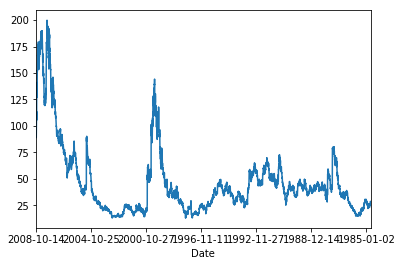

In [352]:
#zrišemo graf - na x osi je časovna serija (index)
appl_close.plot()

### Understanding SettingwithCopyWarning in pandas


#### What is SettingWithCopyWarning?



<img class="full-width" src="https://www.dataquest.io/wp-content/uploads/2019/01/view-vs-copy.png" alt="view-vs-copy">



<img class="full-width" src="https://www.dataquest.io/wp-content/uploads/2019/01/modifying.png" alt="modifying">



In [ ]:
#ko izbiramo, včasih dobimo kopijo podatkov, včasih pa nabor prvotnih pddatkov
#nikoli ne moremo biti sigurni, ali bomo dobili kopijo ali ne - to moramo explicitno povedati

In [353]:
data = pd.read_csv('data/DATA_Xbox.csv')
data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,8213034705,95.0,2.927373,jake7870,0,95.0,117.5
1,8213034705,115.0,2.943484,davidbresler2,1,95.0,117.5
2,8213034705,100.0,2.951285,gladimacowgirl,58,95.0,117.5
3,8213034705,117.5,2.998947,daysrus,10,95.0,117.5
4,8213060420,2.0,0.065266,donnie4814,5,1.0,120.0


In [ ]:
#tega opozorila ni dobro ignorirati - možno je, danaslednjič, ko bomo zagnali, da pa program ne bo deloval


In [ ]:
#to opozorilo se velikorat pojavi pri:
#chain assigment: uporabimo več zaporednih operacij
#access: izberemo en del podatkov, kot indeksiranje 


##Chain assignment primer

In [354]:
#chain assignment primer
#izberemo samo transakcije osebe  parakeet2004
data[data['bidder'] == 'parakeet2004']

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
6,8213060420,3.00,0.186539,parakeet2004,5,1.0,120.0
7,8213060420,10.00,0.186690,parakeet2004,5,1.0,120.0
8,8213060420,24.99,0.187049,parakeet2004,5,1.0,120.0


In [356]:
#biderrate vrednost spremenimo na 100
data[data['bidder'] == 'parakeet2004']['bidderrate'] = 100

#dobimo opozorilo:

/home/manca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [359]:
#pogledamo, kaj se je zgodilo z našimi podatki:
data[data['bidder'] == 'parakeet2004']


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
6,8213060420,3.00,0.186539,parakeet2004,5,1.0,120.0
7,8213060420,10.00,0.186690,parakeet2004,5,1.0,120.0
8,8213060420,24.99,0.187049,parakeet2004,5,1.0,120.0


In [360]:
#bidderrate vrednost se ni spremenila na 100, kot smo hoteli!!
#naredili smo chain assignment in to pythonu lahko povzroča težave: najprej smo izbrali en majhen del podatkov in
#potem na tem majhnem delu spremenili vrednost; vrednost na prvotnem datasetu, pa se ni spremenila!

#pravilen način, kako spremenimo vrednost:
data.loc[data['bidder'] == 'parakeet2004', 'bidderrate'] = 100

In [362]:
#vrednost v prvotnem datasetu se je spremenila!
data[data['bidder'] == 'parakeet2004']

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
6,8213060420,3.00,0.186539,parakeet2004,100,1.0,120.0
7,8213060420,10.00,0.186690,parakeet2004,100,1.0,120.0
8,8213060420,24.99,0.187049,parakeet2004,100,1.0,120.0


In [ ]:
#chain assignment ni dobra praksa, bolje je uporabiti loc, ki spreminja vrednsoti na celem datasetu

In [ ]:
#hidden chain primer:


In [363]:
winners = data.loc[data['bid'] == data['price']]

In [364]:
winners.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
3,8213034705,117.5,2.998947,daysrus,10,95.00,117.5
25,8213060420,120.0,2.999722,djnoeproductions,17,1.00,120.0
44,8213067838,132.5,2.996632,*champaignbubbles*,202,29.99,132.5
45,8213067838,132.5,2.997789,*champaignbubbles*,202,29.99,132.5
66,8213073509,114.5,2.999236,rr6kids,4,1.00,114.5


In [365]:
winners.shape

(43, 7)

In [366]:
#v vrstici 304 bidder stolpec nima vrednsoti, hočem določiti eno vrednost
winners.loc[304,'bidder']

nan

In [369]:
#določimo ime
winners.loc[304, 'bidder'] = 'pravilnoIme'
#v vrstici 304 bidder stolpec nima vrednsoti, hočem določiti eno vrednost
winners.loc[304,'bidder']

'pravilnoIme'

In [ ]:
#zopet dobimo obvesttlo, kljub tem, da smo povsod uporabili loc in da je python naredil, kar smo želeli
#naredili smo hidden chain: dvakrat smo uporabili loc
#ne moremo vedeti ali je python naredil kopijo ali view podatkov (naredi tisto, kar je za ta primer bolj optimalno)
# v hidden chainu je lahko vmes 1000 vrstic kode, zato je napako težko najti


In [370]:
#pravilno: naredimo kopijo
#winners se shrani na eno drugo mesto in potem samo nad tem izvajamo spremembe
winners = data.loc[data['bid'] == data['price']].copy()

In [371]:
winners.loc[304, 'bidder'] = 'pravilnoIme'

In [372]:
winners.loc[304, 'bidder']

'pravilnoIme'

In [ ]:
#POMEMBNO:
#Če hočeš spreminjati original, uporabljaj loc  in določi točno mesto, ki ga hočeš spremenit
#Sicer pa naredi kopijo in potem samo kopijo spreminjaj, ne originala

## Več o 

[Pandas on PyVideo](https://pyvideo.org/)